In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Train = pd.read_csv ("C:/Users/Sdeol/Desktop/all (1)/train1_tech.csv")

In [197]:
Train.head()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus
0,22409,1,0,0,11336,37,0,0,4377,0,0,0,1
1,15809,1,3,5,81978,135,1,0,4835,3,4,1,0
2,17246,1,3,0,134331,81,1,0,265,0,3,1,1
3,13040,1,2,3,50919,66,0,0,4919,2,4,1,0
4,18297,0,2,0,92524,54,1,0,4586,0,3,0,1


In [198]:
Train.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus
count,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000
mean,18784.735824,0.695192,1.581657,2.161092,82289.196891,76.505357,0.498171,3.063627,2606.277110,1.643846,2.342827,0.520512,0.490332
std,4795.026146,0.460356,1.186209,1.731424,40658.245901,29.465195,0.500029,2.005676,1490.015768,1.360103,1.374404,0.499612,0.499939
min,11001.000000,0.000000,0.000000,0.000000,10036.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14760.750000,0.000000,1.000000,1.000000,50765.750000,53.000000,0.000000,1.000000,1296.250000,0.000000,1.000000,0.000000,0.000000
50%,18479.500000,1.000000,2.000000,2.000000,82233.500000,72.000000,0.000000,4.000000,2631.500000,2.000000,3.000000,1.000000,0.000000
75%,22431.500000,1.000000,2.000000,4.000000,109853.500000,89.000000,1.000000,5.000000,3904.750000,3.000000,3.000000,1.000000,1.000000
max,29481.000000,1.000000,4.000000,5.000000,193721.000000,176.000000,1.000000,5.000000,5167.000000,4.000000,4.000000,1.000000,1.000000


Text(0.5,1,'YearlyIncome vs AMS')

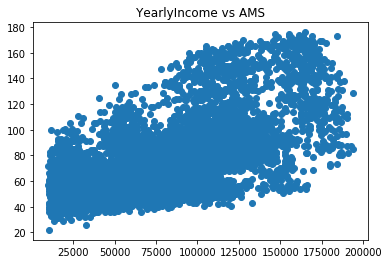

In [199]:
plt.scatter(Train.YearlyIncome, Train.AveMonthSpend)
plt.title ("YearlyIncome vs AMS")

Text(0,0.5,'count')

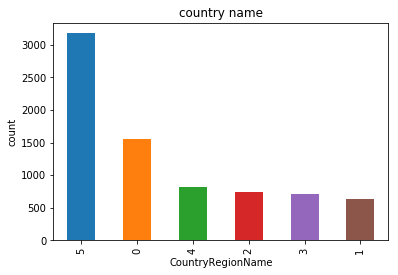

In [200]:
Train["CountryRegionName"].value_counts().plot(kind="bar")
plt.title("country name")
plt.xlabel("CountryRegionName")
plt.ylabel ("count")

Text(0.5,1,'YearlyIncome vs Gender')

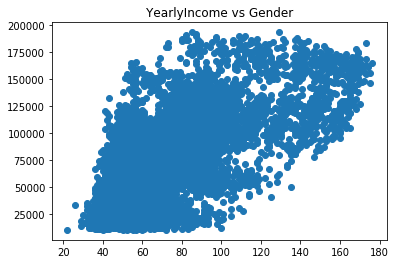

In [201]:
plt.scatter(Train.AveMonthSpend, Train.YearlyIncome)
plt.title ("YearlyIncome vs Gender")

Text(0.5,1,'YearlyIncome vs Gender')

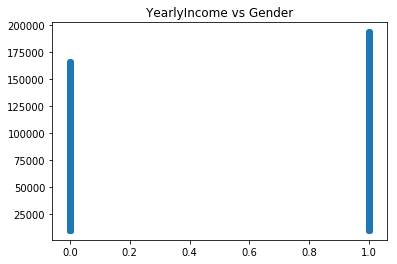

In [202]:
plt.scatter(Train.Gender, Train.YearlyIncome)
plt.title ("YearlyIncome vs Gender")

Text(0.5,1,'AveMonthSpend vs Gender')

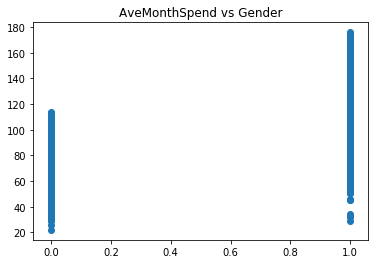

In [203]:
plt.scatter(Train.Gender,Train.AveMonthSpend)
plt.title ("AveMonthSpend vs Gender")

Text(0.5,1,'TotalChildren vs AMS')

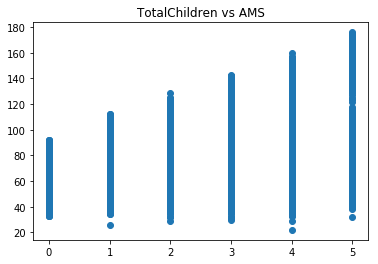

In [204]:
plt.scatter(Train.TotalChildren, Train.AveMonthSpend)
plt.title ("TotalChildren vs AMS")

Text(0.5,1,'MArital Status(1=Single, 0=Married) vs AMS')

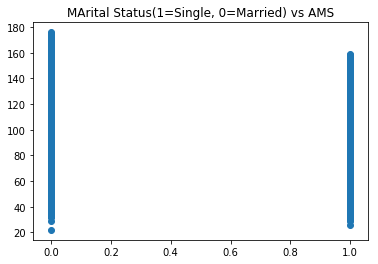

In [205]:
plt.scatter(Train.MaritalStatus, Train.AveMonthSpend)
plt.title ("MArital Status(1=Single, 0=Married) vs AMS")

In [206]:
from sklearn.linear_model import LinearRegression


In [207]:
reg = LinearRegression()

In [208]:
Labels = Train["AveMonthSpend"]
train1 = Train.drop(["CustomerID", "AveMonthSpend"], axis = 1)

In [209]:
from sklearn.cross_validation import train_test_split

In [210]:
x_train,x_test, y_train, y_test = train_test_split(train1, Labels, test_size = 0.10, random_state = 2)


In [211]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [212]:
reg.score(x_test, y_test)

0.8021320906935664

In [213]:
#Using Gradient descent
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = "ls")

In [214]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [215]:
clf.score(x_test, y_test)

0.9408134875078944

In [216]:
y_pred = reg.predict(x_test)

In [217]:
print (y_pred)

[ 38.39918077 103.83218759  70.97350361  61.75764925  67.58927956
  69.32721769  70.03017036 103.76228772 112.07608691  83.24780055
 119.66756691 141.69437861  44.38843725  28.2616198  104.39031407
  97.78968233  97.63404617  37.2875984  105.17839044  75.50655073
 108.04509686 113.8049681  100.9801835  102.15618923  75.02184319
 132.70570186  91.42881577  39.2743049   81.02243194  36.22182392
 112.05796458  89.13376005 101.78385868  66.92435253  91.59563867
  48.84476211  63.93561248  60.39560852 107.00591568  84.76079457
  60.54402117  92.73837106  75.91032945  87.73592051  76.2987448
 134.26369197  80.96453379  46.29938634 142.07891968  77.82761292
 123.1227847   86.97364233 107.93586415  71.81681311  60.75215645
  60.74810167  89.25025408  72.72299021  62.06596653  79.03848492
  82.85904654  70.62903423  58.28232932  91.61390814  59.07983856
  52.06917277 112.57588098 107.61900985 101.95510153  45.70424932
  80.77110394 129.11144403  58.16550626  89.41486765  80.91059258
  89.626111

In [218]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = reg.fit(x_train, y_train)

predictions = model.predict(x_test)

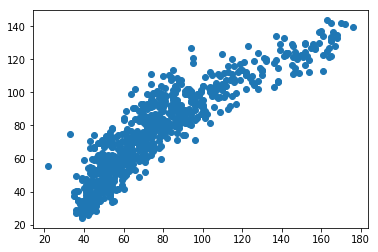

In [219]:
plt.scatter(y_test,y_pred)